In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import metrics

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
x = df.iloc[:,1].values.reshape(-1,1)
y = df.iloc[:,-1].values

In [11]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [12]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train, y_train)
predicted = lg.predict(x_test)

In [14]:
print(metrics.accuracy_score(y_test, predicted))

0.7445887445887446


In [16]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, predicted)
cnf_matrix

array([[139,  18],
       [ 41,  33]])

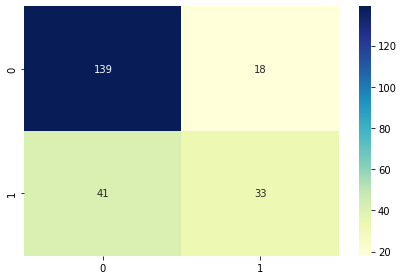

In [17]:
# visualizing confusion matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.show()

In [19]:
# confusion matrix evaluation metrics
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, predicted, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.77      0.89      0.82       157
   with diabetes       0.65      0.45      0.53        74

        accuracy                           0.74       231
       macro avg       0.71      0.67      0.68       231
    weighted avg       0.73      0.74      0.73       231



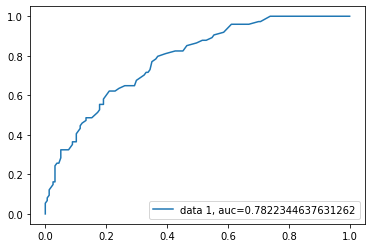

In [20]:
# roc curve

y_pred_proba = lg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()